In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

df = pd.read_csv('C:/Users/Jillian/Desktop/2008.csv.bz2',compression='bz2')

In [3]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [4]:
df.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [5]:
df.isnull().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime               136246
CRSDepTime                 0
ArrTime               151649
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                83365
ActualElapsedTime     154699
CRSElapsedTime           844
AirTime               154699
ArrDelay              154699
DepDelay              136246
Origin                     0
Dest                       0
Distance                   0
TaxiIn                151649
TaxiOut               137058
Cancelled                  0
CancellationCode     6872294
Diverted                   0
CarrierDelay         5484993
WeatherDelay         5484993
NASDelay             5484993
SecurityDelay        5484993
LateAircraftDelay    5484993
dtype: int64

In [6]:
df = df[df.Cancelled != 1]
df = df.drop(columns=['Cancelled', 'CancellationCode'])

In [7]:
df = df.dropna()

In [8]:
df['LateArrival'] = df['ArrDelay'] < 30
df['LateArrival'] = pd.get_dummies(df['LateArrival'])

In [9]:
df['LateArrival'].value_counts()

1    927413
0    597320
Name: LateArrival, dtype: int64

In [10]:
on_time = df[df['LateArrival'] == 0]
late = df[df['LateArrival'] == 1]

In [11]:
from sklearn.utils import resample

late = resample(late, n_samples=597320)

df_2 = pd.concat([late, on_time])

In [12]:
df_2['LateArrival'].value_counts()

1    597320
0    597320
Name: LateArrival, dtype: int64

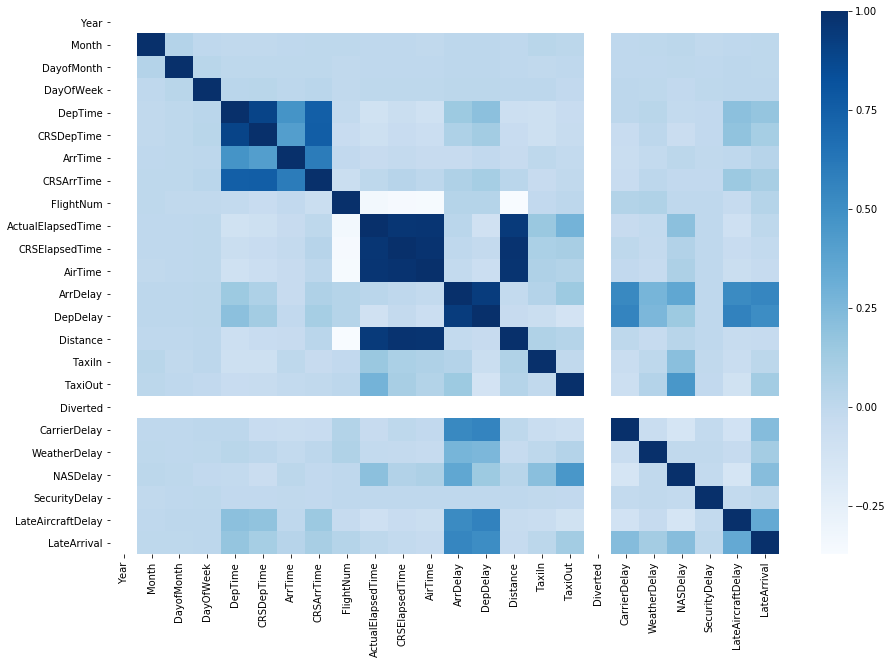

In [13]:
corr = df_2.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr,cmap='Blues')

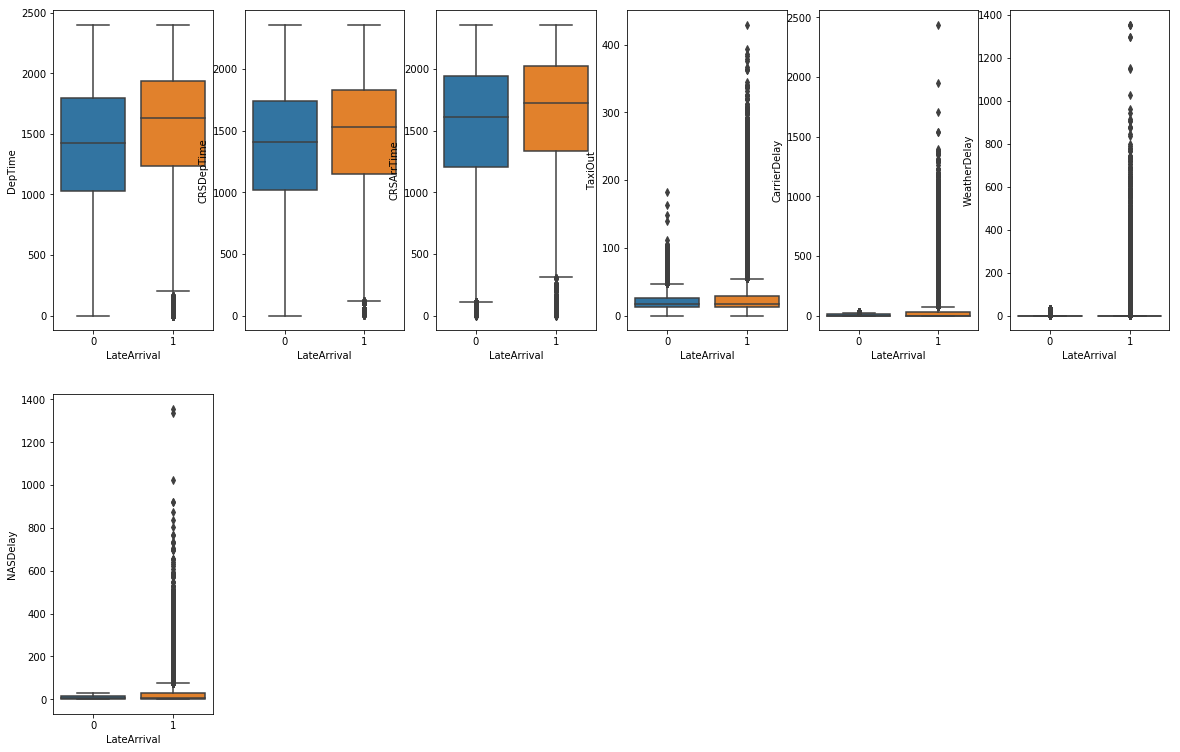

In [14]:
plt.figure(figsize=(20,20))

plt.subplot(3,6,1)
sns.boxplot(x = 'LateArrival', y = 'DepTime', data = df_2)

plt.subplot(3,6,2)
sns.boxplot(x = 'LateArrival', y = 'CRSDepTime', data = df_2)

plt.subplot(3,6,3)
sns.boxplot(x = 'LateArrival', y = 'CRSArrTime', data = df_2)

plt.subplot(3,6,4)
sns.boxplot(x = 'LateArrival', y = 'TaxiOut', data = df_2)

plt.subplot(3,6,5)
sns.boxplot(x = 'LateArrival', y = 'CarrierDelay', data = df_2)

plt.subplot(3,6,6)
sns.boxplot(x = 'LateArrival', y = 'WeatherDelay', data = df_2)

plt.subplot(3,6,7)
sns.boxplot(x = 'LateArrival', y = 'NASDelay', data = df_2)

In [15]:
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import time

In [16]:
X = df_2.drop(columns=['ArrDelay','UniqueCarrier','TailNum','FlightNum','Origin','Dest','DepDelay','LateArrival'])
y = df_2.ArrDelay

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=111)

In [18]:
# Ridge regression
start_time = time.time()

ridgeregr = linear_model.Ridge()
ridgeregr.fit(X_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.2831742763519287 seconds ---


In [19]:
start_time = time.time()

print(ridgeregr.score(X_train, y_train))
print(ridgeregr.score(X_test, y_test))
print("--- %s seconds ---" % (time.time() - start_time))

0.9999999999999998
0.9999999999999998
--- 0.24097800254821777 seconds ---


In [20]:
start_time = time.time()

print(cross_val_score(ridgeregr, X, y, cv=5))

print("--- %s seconds ---" % (time.time() - start_time))

[1. 1. 1. 1. 1.]
--- 3.007350444793701 seconds ---


In [21]:
predictions = ridgeregr.predict(X_test)

(array([3.86369e+05, 7.17200e+03, 4.97000e+02, 1.05000e+02, 4.60000e+01,
        2.80000e+01, 9.00000e+00, 4.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([  14.9999926 ,  208.59999297,  402.19999334,  595.7999937 ,
         789.39999407,  982.99999443, 1176.5999948 , 1370.19999517,
        1563.79999553, 1757.3999959 , 1950.99999627]),
 <a list of 10 Patch objects>)

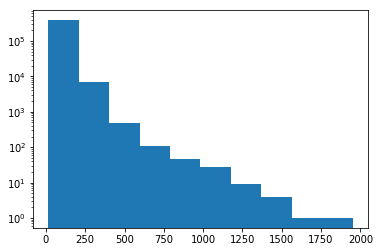

In [22]:
plt.yscale('log')
plt.hist(predictions)

(array([3.86369e+05, 7.17200e+03, 4.97000e+02, 1.05000e+02, 4.60000e+01,
        2.80000e+01, 9.00000e+00, 4.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([  15. ,  208.6,  402.2,  595.8,  789.4,  983. , 1176.6, 1370.2,
        1563.8, 1757.4, 1951. ]),
 <a list of 10 Patch objects>)

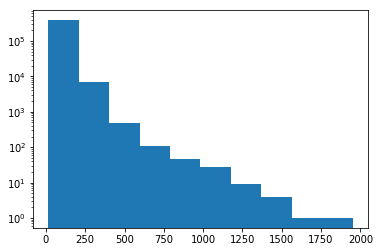

In [23]:
plt.yscale('log')
plt.hist(y_test)

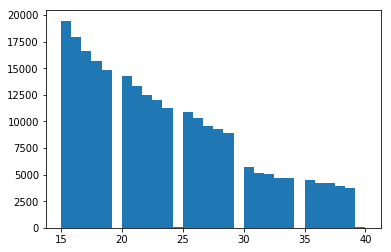

In [24]:
#plt.yscale('log')
plt.hist(predictions[predictions<40],bins=30);

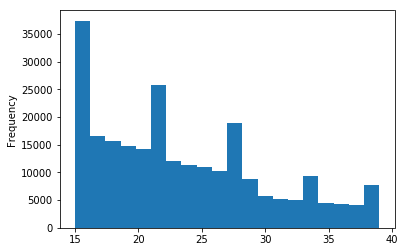

In [25]:
y_test[y_test<40].plot.hist(bins=20);

In [26]:
y_test[y_test<40].value_counts().sort_index()

15.0    19459
16.0    17944
17.0    16613
18.0    15705
19.0    14821
20.0    14280
21.0    13297
22.0    12439
23.0    12046
24.0    11266
25.0    10924
26.0    10306
27.0     9570
28.0     9298
29.0     8884
30.0     5696
31.0     5135
32.0     5060
33.0     4703
34.0     4646
35.0     4542
36.0     4256
37.0     4203
38.0     3923
39.0     3772
Name: ArrDelay, dtype: int64

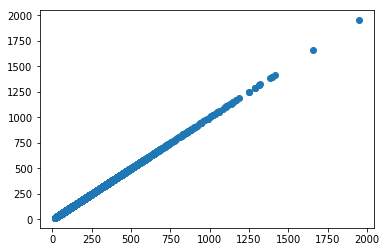

In [27]:
plt.scatter(x=predictions,y=y_test)

In [31]:
# KNN Regressor
from sklearn import neighbors

start_time = time.time()

knn = neighbors.KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

--- 67.64459300041199 seconds ---


In [32]:
start_time = time.time()

print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

print("--- %s seconds ---" % (time.time() - start_time))

0.9692756137716699
0.9615688266247646
--- 239.04858446121216 seconds ---


In [33]:
predictions = knn.predict(X_test)

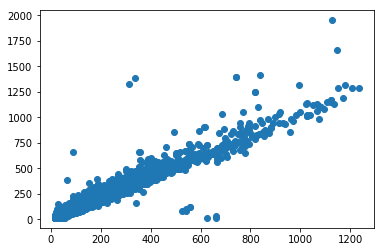

In [34]:
plt.scatter(x=predictions,y=y_test)

In [42]:
# Decision trees
from sklearn import tree

start_time = time.time()

decision_tree = tree.DecisionTreeRegressor(max_depth=10)
decision_tree.fit(X_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

--- 6.213324546813965 seconds ---


In [43]:
start_time = time.time()

print(decision_tree.score(X_train, y_train))
print(decision_tree.score(X_test, y_test))

print("--- %s seconds ---" % (time.time() - start_time))

0.9764045247019014
0.9708680529048036
--- 0.3546581268310547 seconds ---


In [44]:
predictions = decision_tree.predict(X_test)

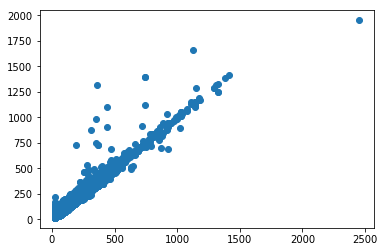

In [45]:
plt.scatter(x=predictions,y=y_test)

The ridge regression model seemed to work really well and did not take too long to process. The KNN model and the decision tree model also worked really well but not as well as the ridge regression and the KNN model took a little longer to process.